In [42]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/ML/air

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/ML/air'
/content/drive/.shortcut-targets-by-id/18Ltirf4CTbmFDC0X6MqW7_u_hylkWpfP/air


In [43]:
"""
LONG SHORT-TERM MEMORY (LSTM)
"""

'\nLONG SHORT-TERM MEMORY (LSTM)\n'

In [44]:
import json
import math
from math import floor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import pinv2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,median_absolute_error,r2_score

In [45]:
# fix random seed for reproducibility
np.random.seed(7)

            Date  Delhi
0     2015-01-01  472.0
1     2015-01-02  454.0
2     2015-01-03  143.0
3     2015-01-04  319.0
4     2015-01-05  325.0
...          ...    ...
2004  2020-06-27  112.0
2005  2020-06-28  196.0
2006  2020-06-29  233.0
2007  2020-06-30  114.0
2008  2020-07-01  101.0

[2009 rows x 2 columns]
[472. 454. 143. ... 233. 114. 101.]


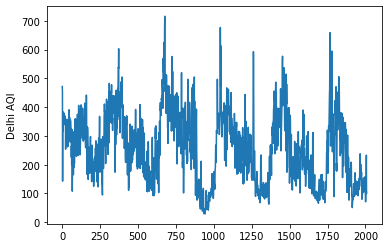

In [46]:
# load the dataset
delhi_AQI_df = pd.read_csv('/content/drive/MyDrive/ML/air/ws_max_2015/c_d_AQI.csv', usecols=['Date','Delhi'])
print(delhi_AQI_df)
aqi_arr = delhi_AQI_df['Delhi'].to_numpy()
print(aqi_arr)
plt.plot(aqi_arr)
plt.ylabel('Delhi AQI')
plt.show()
dataset=np.reshape(aqi_arr, (len(aqi_arr), 1))
dataset = dataset.astype('float32')

In [47]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [48]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [49]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [50]:
#HYPERPARAMETERS
look_back=5
epoch=50
batch_size=3
hidden_cells=5

In [51]:
# reshape into X=t and Y=t+1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [52]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [53]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(hidden_cells, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=epoch, batch_size=batch_size, verbose=2)

Epoch 1/50
467/467 - 3s - loss: 0.0194 - 3s/epoch - 6ms/step
Epoch 2/50
467/467 - 1s - loss: 0.0083 - 1s/epoch - 2ms/step
Epoch 3/50
467/467 - 1s - loss: 0.0072 - 950ms/epoch - 2ms/step
Epoch 4/50
467/467 - 1s - loss: 0.0067 - 941ms/epoch - 2ms/step
Epoch 5/50
467/467 - 1s - loss: 0.0063 - 971ms/epoch - 2ms/step
Epoch 6/50
467/467 - 1s - loss: 0.0062 - 901ms/epoch - 2ms/step
Epoch 7/50
467/467 - 1s - loss: 0.0061 - 936ms/epoch - 2ms/step
Epoch 8/50
467/467 - 1s - loss: 0.0060 - 937ms/epoch - 2ms/step
Epoch 9/50
467/467 - 1s - loss: 0.0059 - 945ms/epoch - 2ms/step
Epoch 10/50
467/467 - 1s - loss: 0.0058 - 915ms/epoch - 2ms/step
Epoch 11/50
467/467 - 1s - loss: 0.0058 - 897ms/epoch - 2ms/step
Epoch 12/50
467/467 - 1s - loss: 0.0057 - 928ms/epoch - 2ms/step
Epoch 13/50
467/467 - 1s - loss: 0.0057 - 905ms/epoch - 2ms/step
Epoch 14/50
467/467 - 1s - loss: 0.0057 - 903ms/epoch - 2ms/step
Epoch 15/50
467/467 - 1s - loss: 0.0057 - 902ms/epoch - 2ms/step
Epoch 16/50
467/467 - 1s - loss: 0.0056 

In [54]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [55]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [56]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('\n\nTrain Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
print("\nr2 score = ",r2_score(testY.flatten(), testPredict.flatten()))



Train Score: 50.23 RMSE
Test Score: 47.87 RMSE

r2 score =  0.8360437128648233


Text(0.5, 1.0, 'Long Short-Term Memory (LSTM)')

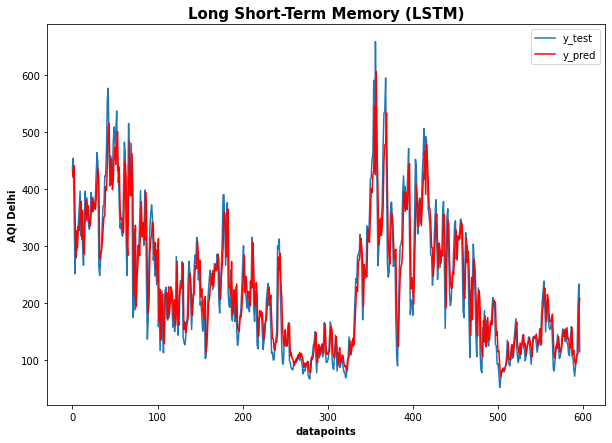

In [57]:
# plot forecasts against actual outcomes
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(testY.flatten(),label = 'y_test')
ax.plot(testPredict.flatten(), color='red',label = 'y_pred')
ax.legend()
plt.ylabel('AQI Delhi',fontweight='bold')
plt.xlabel('datapoints',fontweight='bold')
plt.title('Long Short-Term Memory (LSTM)',fontweight='bold',fontsize=15)

In [58]:
#calculate score
print("R2 Score = ",r2_score(testY.flatten(),testPredict.flatten()))
print("Variance Score = ",explained_variance_score(testY.flatten(),testPredict.flatten()))
print("\nMean Absolute Error (MAE) = ",mean_absolute_error(testY.flatten(),testPredict.flatten()))
print("Mean Squared Error (MSE) = ",mean_squared_error(testY.flatten(),testPredict.flatten()))
print("Root Mean Squared Error (RMSE) = ",mean_squared_error(testY.flatten(),testPredict.flatten(),squared=False))
print("Mean Absolute Percentage Error (MAPE) = ",mean_absolute_percentage_error(testY.flatten(),testPredict.flatten()))
print("Meadian Relative Absolute Error (MRAE) = ",median_absolute_error(testY.flatten(),testPredict.flatten()))

R2 Score =  0.8360437128648233
Variance Score =  0.8363948812013033

Mean Absolute Error (MAE) =  35.351982962319866
Mean Squared Error (MSE) =  2291.5515405740052
Root Mean Squared Error (RMSE) =  47.87015291989368
Mean Absolute Percentage Error (MAPE) =  0.17494972482496035
Meadian Relative Absolute Error (MRAE) =  26.202332822605968


In [60]:
LSTM_res=[r2_score(testY.flatten(),testPredict.flatten()),
         explained_variance_score(testY.flatten(),testPredict.flatten()),
         mean_absolute_error(testY.flatten(),testPredict.flatten()),
         mean_absolute_percentage_error(testY.flatten(),testPredict.flatten()),
         mean_squared_error(testY.flatten(),testPredict.flatten(),squared=False)]
print("LSTM_res =",LSTM_res)

LSTM_res = [0.8360437128648233, 0.8363948812013033, 35.351982962319866, 0.17494972482496035, 47.87015291989368]
